# NY Parking Violation Data Analysis

**Mini Project**

IISC | M.Tech (Online) | DSBA
DA 231-O Data Engineering at Scale

Mentor: **Yogesh Simmhan** (simmhan@iisc.ac.in)

## Team

1. Satyam Kumar | satyamk@iisc.ac.in | 9092696415
2. Siva Kranthi Kumar Mallipeddi | sivam@iisc.ac.in | 9986778909
3. Sreedhar Reddy Vundela | sreedharv@iisc.ac.in | 9886702749
4. Sudhakar Kulkarni Mukayya | sudhakark@iisc.ac.in | 9035076656

## Problem

* Exploratory data analysis of **NYC Parking violation** data for **2017** – **2021** years (5 years)
* Infer from the data analysis findings

> **Dataset** : https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2022/pvqr-7yc4

## Environment

* Python 3
* Spark 3.0 (colab) / 3.1 (local)
* Spark Data Frames & Spark SQL
* Local & Google Colab

## Dataset Details

Dataset contains New York city Police Department issued parking violations details

### Raw Dataset details
- Fiscal year data (July 1 - June 30) is available. That means one file contains data for 2 years
- All years data has same 43 columns
- Total Number of records: **xxxx** # TODO

### Processed Data details
- Removed 30 columns which are not used in our analysis (Most of the removed columns don't have data for > 50% records)
- Total Columns: 13
- Total Number of records: **xxxx** # TODO

### Columns Summary

| S. No. | Source   Column Name    | Description/Comment                                  |
|--------|-------------------------|------------------------------------------------------|
| 1      | SUMMONS NUMBER          | UNIQUE IDENTIFIER OF SUMMONS                         |
| 2      | PLATE ID                | REGISTERED PLATE ID                                  |
| 3      | REGISTRATION STATE      | STATE OF PLATE   REGISTRATION                        |
| 4      | PLATE TYPE              | TYPE OF PLATE                                        |
| 5      | ISSUE DATE              | ISSUE DATE                                           |
| 6      | VIOLATION CODE          | TYPE OF   VIOLATION                                  |
| 7      | VEHICLE BODY TYPE       | VEHICLE BODY TYPE   WRITTEN ON SUMMONS (SEDAN, ETC.) |
| 8      | VEHICLE MAKE            | MAKE OF CAR WRITTEN ON SUMMONS                       |
| 9      | VIOLATION PRECINCT      | POLICE STATION OF VIOLATION                          |
| 10     | ISSUER PRECINCT         | PRECINCT OF ISSUANCE                                 |
| 11     | VIOLATION TIME          | VIOLATION TIME                                       |
| 12     | VEHICLE COLOR           | CAR COLOR WRITTEN ON   SUMMONS                       |
| 13     | VIOLATION   DESCRIPTION | DESCRIPTION OF   VIOLATION                           |

### Columns Details

#### Plate Type

Registration Class Codes for vehicles. 3 letters code

Common Plate types are 
* Passenger Vehicles (PAS): standard issue plates
* Commercial Vehicles (COM): Full-size vans and most pickups
* Medallion (OMT): Taxis
* Personalized Plates (SRF): cars, mini-vans, SUVs and some pick-ups registered as passenger class
* Special Omnibus Rentals (OMS)

https://dmv.ny.gov/registration/registration-class-codes

#### Violation Code
Type of violation. Codes are from 1-99. Fines are charged based on this

https://data.cityofnewyork.us/api/views/pvqr-7yc4/files/7875fa68-3a29-4825-9dfb-63ef30576f9e?download=true&filename=ParkingViolationCodes_January2020.xlsx

#### Vehicle Body Type

Common Vehicle body types are 
* suburban(SUBN): Vehicle that can be used to carry passengers and cargo
* four-door sedan (4DSD)
* Van Truck (VAN
* Delivery Truck (DELV)
* Pick-up Truck (PICK)
* two-door sedan (2DSD) 
* Sedan (SEDN)

https://nysdmv.custhelp.com/app/answers/detail/a_id/491/kw/body%20type%20subn

#### Vehicle Make

The DMV code for the make of a vehicle that appears on the registration. The DMV make code is the first 5 letters of the vehicle’s make name. If the vehicle make is more than one word, the make code is the first 2 letters of the first two words with a slash in between

Common Vehicle Makes are 
* Honda (HONDA)
* Toyota (TOYOT)
* Ford (FORD)
* Nissan (NISSA)
* Chevrolet (CHEVR)
* mercedes benz (ME/BE)

https://data.ny.gov/Transportation/Vehicle-Makes-and-Body-Types-Most-Popular-in-New-Y/3pxy-wy2i
https://data.ny.gov/api/assets/83055271-29A6-4ED4-9374-E159F30DB5AE

#### Vehicle Colors

Common colors are
* Gray (GY)
* White (WH)
* Black (BK)
* Blue (BL)
* Red (RD)

## Config

In [1]:
# Execution environment. Use False for local execution
colab_env = False

# Use Sample file for speedy execution
sample_file = True
sample_file_path = 'TODO:' if colab_env else "../data/sample-100000.csv"

# Specify the raw CSV files path
raw_CSV_path = 'TODO:' if colab_env else "../data/Parking*.csv"

csv_files = sample_file_path if sample_file else raw_CSV_path

# For faster execution. Some statements are skipped based on this check
presenting = True

# Specify the years for which we are reading the data from CSV
years = [2017, 2018, 2019, 2020, 2021]

# Schema Types. Only specify for the non-string type & NULL columns. Others  are considered as string
schema_types = {
  "Summons Number": {"type": "long", "null": False},
  "Issue Date"    : {"type": "date" if sample_file else "string", "null": True}, 
  "Violation Code": {"type": "integer", "null": True},
  "Violation Precinct": {"type": "integer", "null": True},
  "Issuer Precinct": {"type": "integer", "null": True},
}

# Columns which are used in the analysis. Other columns will be removed
used_columns = ["Summons Number", "Plate ID", "Registration State", "Plate Type", "Issue Date", "Violation Code", "Vehicle Body Type", "Vehicle Make", "Violation Precinct", "Issuer Precinct", "Violation Time", "Vehicle Color", "Violation Description"]

# All the columns which are there in the datset (Need to be in CSV file order)
schema_columns = ["Summons Number", "Plate ID", "Registration State", "Plate Type", "Issue Date", "Violation Code", "Vehicle Body Type", "Vehicle Make", "Issuing Agency", "Street Code1", "Street Code2", "Street Code3", "Vehicle Expiration Date", "Violation Location", "Violation Precinct", "Issuer Precinct", "Issuer Code", "Issuer Command", "Issuer Squad", "Violation Time", "Time First Observed", "Violation County", "Violation In Front Of Or Opposite", "House Number", "Street Name", "Intersecting Street", "Date First Observed", "Law Section", "Sub Division", "Violation Legal Code", "Days Parking In Effect    ", "From Hours In Effect", "To Hours In Effect", "Vehicle Color", "Unregistered Vehicle?", "Vehicle Year", "Meter Number", "Feet From Curb", "Violation Post Code", "Violation Description", "No Standing or Stopping Violation", "Hydrant Violation", "Double Parking Violation"] if not sample_file else [i.lower().replace(" ", '_') for i in used_columns]

# Generates the sample CSV 
if not sample_file:
  sample_CSV_generate = True # Generate the sample CSV
  sample_CSV_records = 100000 # No. of records to write into the sample CSV file
  sample_CSV_path = f"../data/sample-{sample_CSV_records}.csv" # path to save
  sample_seed = sample_CSV_records # Seed value so that we get same random records

## Setup

### Spark Setup

In [3]:
# For google Colab
if colab_env:
  !apt-get install openjdk-8-jdk-headless -qq > /dev/null
  !wget -q https://mirrors.estointernet.in/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz -P /content/
  !tar xf /content/drive/Shareddrives/DA231-2021-Aug-Public/spark-3.0.3-bin-hadoop2.7.tgz
  !pip install -q findspark
else :
  import os
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

### Imports

In [4]:
# Reload all changed modules every time before executing a new line
%load_ext autoreload
%autoreload 2

In [5]:
# PySpark related
import findspark
findspark.init()
findspark.find()

from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.functions import col # Frequently using this. hence imported separately

# user defined modules import
import data_preprocess as dp
import basic_analysis as ba
import precinct_based_analysis as pba
import time_based_analysis as tba
import season_based_analysis as sba
import revenue_based_analysis as rba
import mis_analysis as ma

### Spark Session

In [6]:
spark = (
          SparkSession
            .builder
            .master("local[*]") # Using all available cores
            .appName("NYC Parking Violation Analysis")
            .getOrCreate()
        )
spark

21/12/09 20:58:51 WARN Utils: Your hostname, sudhakar-mk resolves to a loopback address: 127.0.1.1; using 172.19.168.212 instead (on interface eth0)
21/12/09 20:58:51 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/12/09 20:58:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


## Data Pre-processing

### Reading CSV files into DataFrame

In [7]:
# Better performance than inferSchema=True
NY_schema = dp.get_schema(schema_columns, schema_types)

org_df = spark.read.option("header", True).schema(NY_schema).csv(csv_files)

In [11]:
if not sample_file:
  print(f'Shape : {(org_df.count(), len(org_df.columns))}')
  org_df.printSchema()
  org_df.show(2)

In [12]:
if not sample_file:
  presenting and org_df.summary().toPandas().transpose() # More execution time

### Pre-processing

In [8]:
# No pre-processing while using Sample file
df = org_df
if not sample_file:
  spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
  df = dp.remove_unused_columns(df, used_columns)
  df = dp.drop_duplicates(df)
  df = dp.santize_column_names(df)
  #dp.assert_uniqueness(df, column_name="summons_number")
  df = dp.convert_to_date(df, column_name="issue_date", format="MM/dd/yyyy")
  df = dp.remove_outside_years_data(df, years, "issue_date")
  # df = dp.remove_invalid_violation_code_data(df) # TODO: Maybe we can handle in individual file

## Sample file generation

In [9]:
from pathlib import Path
from shutil import rmtree

def write_CSV(df, CSV_path):
  
  # Creates CSV in a folder. But memory efficient
  df.coalesce(1).write.mode("overwrite").csv(CSV_path, header=True) 

  # OOM
  # df.toPandas().to_csv(CSV_path, index=False)

  # Moving file to data folder
  f_path = list(Path(CSV_path).glob('*.csv'))[0]
  Path(f_path).rename(CSV_path+'.tmp')
  rmtree(CSV_path)
  Path(CSV_path+'.tmp').rename(CSV_path)


In [10]:
if (not sample_file and sample_CSV_generate):
  total_records = df.count()
  fraction = (sample_CSV_records+10000)/total_records # Exact records are not coming. Hence increasing the fraction using 10k
  sample_df = df.sample(fraction=fraction, seed=sample_seed).limit(sample_CSV_records) # Getting exact number of records
  print(f"Sample records: {sample_df.count()}")
  write_CSV(sample_df, sample_CSV_path)
  #df = sample_df

## Final DF / Table for Analysis

In [11]:
#df.cache() # Cache the data
total_records = df.count() # Materialize the cache
print(f'Shape : {(total_records, len(df.columns))}')
df.printSchema()
df.show(2)

Shape : (60076484, 13)
root
 |-- summons_number: string (nullable = true)
 |-- plate_id: string (nullable = true)
 |-- registration_state: string (nullable = true)
 |-- plate_type: string (nullable = true)
 |-- issue_date: string (nullable = true)
 |-- violation_code: string (nullable = true)
 |-- vehicle_body_type: string (nullable = true)
 |-- vehicle_make: string (nullable = true)
 |-- violation_precinct: string (nullable = true)
 |-- issuer_precinct: string (nullable = true)
 |-- violation_time: string (nullable = true)
 |-- vehicle_color: string (nullable = true)
 |-- violation_description: string (nullable = true)

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+------------------+---------------+--------------+-------------+---------------------+
|summons_number|plate_id|registration_state|plate_type|issue_date|violation_code|vehicle_body_type|vehicle_make|violation_precinct|issuer_precinct|violation_time|vehicle_co

In [17]:
presenting and df.describe().toPandas().transpose() # More execution time

,0,1,2,3,4
summary,count,mean,stddev,min,max
summons_number,100000,7.10178748260407E9,2.3246676068622017E9,1253023300,8999150781
plate_id,100000,Infinity,NaN,00075W4,ZZZ2P
registration_state,100000,99.0,0.0,99,WY
plate_type,100000,999.0,0.0,999,VAS
issue_date,100000,None,None,2017-03-03,2022-09-04
violation_code,100000,34.153,18.43247537802471,0,99
vehicle_body_type,99661,Infinity,NaN,12PU,YY
vehicle_make,99636,1.0,NaN,1,ZNEN
violation_precinct,100000,39.17843,41.73179588950109,0,99


In [18]:
df.createOrReplaceTempView("NYCPV")

## Analysis

### 01 Basic Analysis

#### **How often does each violation code occur? (frequency of violation codes find the top 5) ?** 

Top5 frequency of violation codes


,violation_code,no_of_tickets
0,36,12131108
1,21,7920050
2,38,5292621
3,14,4607652
4,20,3737246
...,...,...
95,15,56
96,88,53
97,93,43
98,57,40


<Figure size 432x288 with 0 Axes>

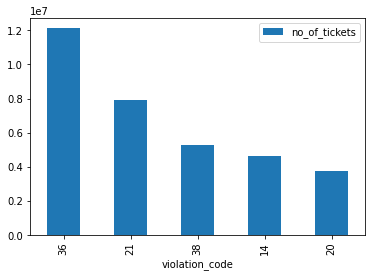

In [21]:
print('Top5 frequency of violation codes')
ba.violation_frequencey(df)

#### **How often does each vehicle body type get a parking ticket? How about the vehicle make? (find the top 5 for both) ?**

Top5 Body type


Top5 Vehicle Make


,vehicle_make,Ticket_Frequency
0,FORD,6604040
1,TOYOT,6600886
2,HONDA,6406506
3,NISSA,5243006
4,CHEVR,3581781
...,...,...
14356,UNHOO,1
14357,MAGER,1
14358,PENST,1
14359,SEAUB,1


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

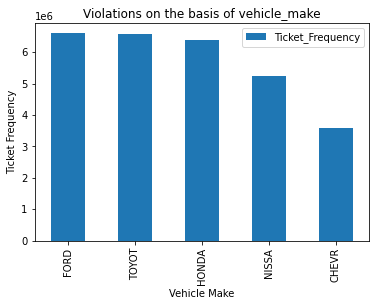

In [23]:
print('Top5 Body type')
ba.violations_by_bodytype(df)

print('Top5 Vehicle Make')
ba.violations_by_make(df)

### 02 Precinct based Analysis

A **precinct** is a police station that has a certain zone of the city under its command

#### **Find the (5 highest) frequencies of violating Precincts (this is the precinct of the zone where the violation occurred)**

In [27]:
print('Top 5 Violation precicts')
pba.violating_precicts(df, True)

Top 5 Violation precicts


,violation_precinct,count(violation_precinct)
0,0,15870961
1,19,2300008
2,14,1810244
3,18,1641317
4,1,1529859
...,...,...
311,717,1
312,330,1
313,145,1
314,946,1


#### **Find the (5 highest) frequencies of Issuing Precincts (this is the precinct that issued the ticket)**

In [28]:
print('Top 5 Issuer precicts')
pba.issuing_precincts(df, True)

Top 5 Issuer precicts


,issuer_precinct,count(issuer_precinct)
0,0,17393927
1,19,2233494
2,14,1744910
3,18,1579284
4,1,1496414
...,...,...
828,717,1
829,847,1
830,532,1
831,542,1


#### **Find the violation code frequency across 3 precincts which have issued the most number of tickets (Top 5)**

Violation frequencies from top 3 issuer precicts


,violation_code,count(violation_code)
0,7,2214178
1,51,10340
2,54,11366
3,15,4
4,11,16099
...,...,...
94,2,292
95,80,7874
96,50,21821
97,45,2939


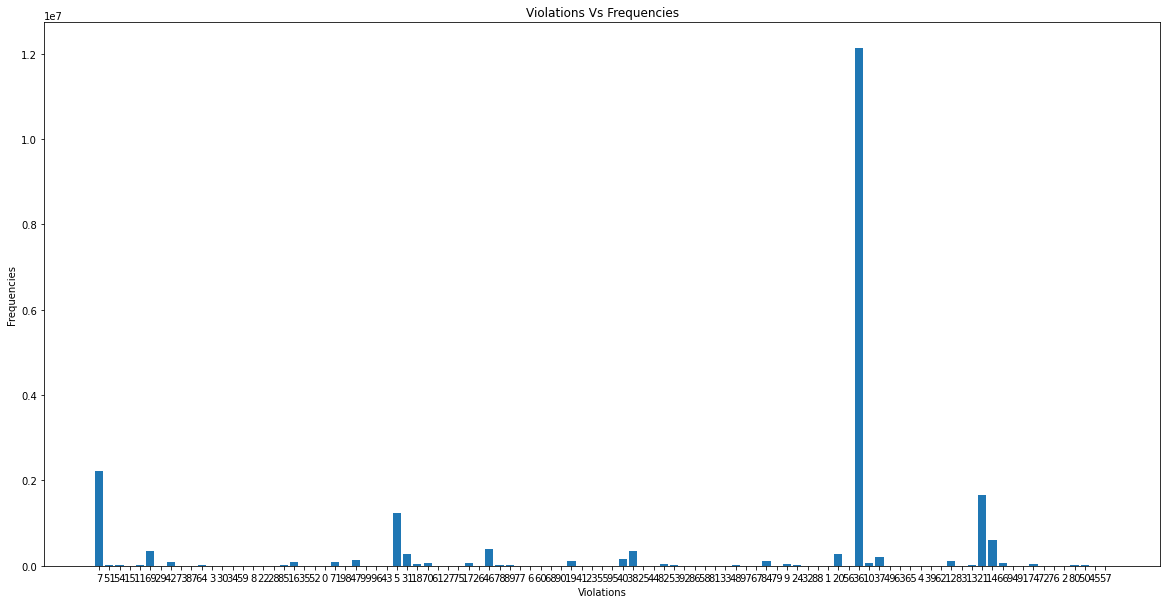

In [29]:
print('Violation frequencies from top 3 issuer precicts')
pba.violation_code_frequency_top3_precincts(df, True)

### 03 Time based Analysis

#### **Divide 24 hours into 6 equal discrete bins of time. For each of these groups, find the 3 most commonly occurring violations**

#### **For the 5 most commonly occurring violation codes, find the most common times of day (in terms of the bins from the previous part)**

### 04 Year / Season based Analysis

#### **What is the average reduction in violations for the year 2020 compared to 2019 (due to COVID), and year 2019 compared to 2018**

Reduction in violations due to covid


,Reduction Years,Reduction
0,Reduction 2019 from 2018,-7.961579
1,Reduction 2020 from 2019,-2.400658


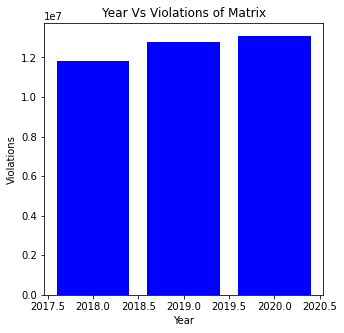

In [30]:
print("Reduction in violations due to covid")
sba.reduction_in_violations(df)

#### **Divide the year into 3 number of seasons, and find frequencies of tickets for each season**

Frequencies of violation in each season


,season,No of tickets
0,winter,13684933
1,summer,16621728
2,spring,14816765
3,autumn,14953058


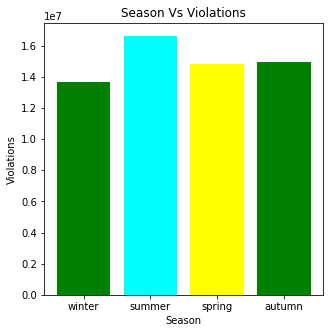

In [31]:
print("Frequencies of violation in each season")
sba.season_violation_frequencies(df)

#### **Find the 3 most common violations for each of these seasons**

Frequencies of violation in each season


,Violation Code,Frequency,Season
0,36,3238563,spring
1,21,1831167,spring
2,38,1237690,spring
3,36,2366506,winter
4,21,1830435,winter
5,38,1311105,winter
6,36,3644846,summer
7,21,2291042,summer
8,38,1364002,summer
9,36,2881193,autumn


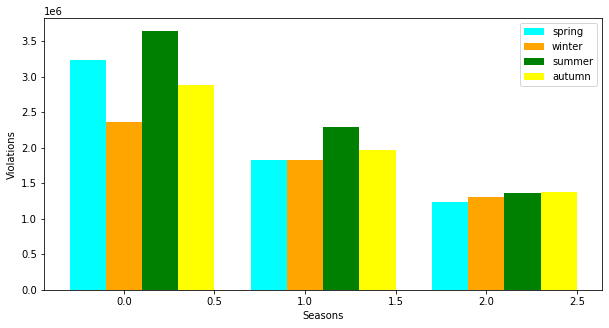

In [32]:
print("Frequencies of violation in each season")
sba.common_violations_season(df)

### 05 Revenue based Analysis

The fines collected from all the parking violation constitute a revenue source for the NYC police department
Fine amounts for each violation code are listed here https://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page

#### **Find the total amount collected year wise**

#### **Find the top 5 violation codes which collected highest amount**

### 06 Miscellaneous Analysis

In [16]:
# spark.stop() #TODO: Use this at the end of the script